## Lectures catalogues SDSS et ROSAT
Il va falloir passer des fichiers .fit à des dataframes pour pouvoir les manipuler par la suite.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import math as m 

Fonction pour passer de .fit à un dataframe : 

In [3]:
def fits_to_dataframe(fits_file):
    with fits.open(fits_file) as hdul:
        data = hdul[1].data # Assuming the data is in the first extension
        df = pd.DataFrame(data)
    return df


On va importer les .fit et les convertir en dataframe. On commmence par indiquer le chemin des catalogues, X et optique : 

In [11]:
path_X = 'SDSS_ROSAT/ROSAT_vikhlinin_98.fit'
path_opt = 'SDSS_ROSAT/Wen_2012_SDSS_ascii.fit'

On les convertit en dataframe et on affiche leur structure :

In [12]:
X_df = fits_to_dataframe(path_X)
X_df

,_Glon,_Glat,_RAJ2000,_DEJ2000,__VMF98_,RAJ2000,DEJ2000,FX,e_FX,Rc,e_Rc,z,detFlag,Note
0,117.120151,-36.330684,7.638333,26.305278,1,00 30 33.2,+26 18 19,24.3,3.0,31,3,0.50,,0
1,88.615715,-85.827772,10.292917,-23.659167,2,00 41 10.3,-23 39 33,9.8,2.4,25,12,0.15,,0
2,122.564764,-72.358094,12.746667,-9.486667,3,00 50 59.2,-09 29 12,36.6,4.9,45,4,0.21,,0
3,278.665813,-88.603951,13.511667,-28.399444,4,00 54 02.8,-28 23 58,10.8,1.5,37,6,0.25,,0
4,137.517149,-84.946862,14.232500,-22.231389,5,00 56 55.8,-22 13 53,25.9,5.2,61,12,0.11,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,94.930743,-43.448450,352.207917,14.886667,219,23 28 49.9,+14 53 12,7.6,1.7,27,12,0.49,,0
219,355.416709,-70.183152,352.967083,-37.786389,220,23 31 52.1,-37 47 11,10.8,4.7,46,25,0.26,,0
220,12.244639,-75.747516,357.223750,-31.288889,221,23 48 53.7,-31 17 20,32.5,5.1,43,8,0.21,,39
221,11.862211,-75.776243,357.281667,-31.373889,222,23 49 07.6,-31 22 26,6.0,1.4,21,6,0.00,F,0


In [13]:
opt_df = fits_to_dataframe(path_opt)
opt_df

,_Glon,_Glat,_RAJ2000,_DEJ2000,WHL,RAJ2000,DEJ2000,zph,zsp,rmag,r200,RL_,N200,Other
0,110.449770,-29.412918,0.00236,32.20925,J000000.6+321233,0.00236,32.20925,0.1274,0.0000,14.92,1.72,70.63,24,Abell \r
1,100.049559,-55.283431,0.00957,5.28827,J000002.3+051718,0.00957,5.28827,0.1696,0.0000,16.20,0.94,17.48,9,\r
2,110.203228,-30.366812,0.01377,31.23175,J000003.3+311354,0.01377,31.23175,0.5428,0.0000,20.17,0.87,14.27,8,\r
3,110.350581,-29.827793,0.01475,31.78564,J000003.5+314708,0.01475,31.78564,0.0932,0.0000,15.18,0.94,16.97,9,\r
4,98.226082,-57.913027,0.01945,2.47386,J000004.7+022826,0.01945,2.47386,0.4179,0.0000,19.32,0.95,13.71,10,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132679,107.667888,-38.665737,359.98712,22.67506,J235956.9+224030,359.98712,22.67506,0.3590,0.0000,18.27,1.00,19.46,11,\r
132680,104.152271,-47.689671,359.99329,13.29671,J235958.4+131748,359.99329,13.29671,0.1710,0.0000,16.57,0.91,14.23,11,\r
132681,96.879786,-59.541787,359.99500,0.70175,J235958.8+004206,359.99500,0.70175,0.0741,0.0817,14.89,1.01,19.64,11,AMF \r
132682,107.386151,-39.528437,359.99677,21.78513,J235959.2+214706,359.99677,21.78513,0.4303,0.0000,18.90,1.00,19.17,11,\r


    SDSS :

In [97]:
#Importing the FITS file and seeing its structure
# We import Table 4 only, which is containing the clusters
with fits.open("Wen_2012_SDSS.fit") as hdul:
    
    print('Structure of the FITS file Wen_2012_SDSS.fit:','\n')
    hdul.info()  
    data = hdul[1].data  # Assuming the data is in the first extension
    print('\n')
    print('1st extension data Wen_2012_SDSS.fit:','\n')
    print(data,'\n')

Structure of the FITS file Wen_2012_SDSS.fit: 

Filename: Wen_2012_SDSS.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  J_ApJS_199_34_table1    1 BinTableHDU     97   132684R x 14C   [D, D, D, D, 16A, D, D, E, E, E, E, E, I, 28A]   




1st extension data Wen_2012_SDSS.fit: 

[(110.44976994, -29.412918  , 2.3600000e-03, 32.20925, 'J000000.6+321233', 2.3600000e-03, 32.20925, 0.1274,    nan, 14.92, 1.72, 70.63, 24, 'Abell')
 (100.04955895, -55.28343154, 9.5700000e-03,  5.28827, 'J000002.3+051718', 9.5700000e-03,  5.28827, 0.1696,    nan, 16.2 , 0.94, 17.48,  9, '')
 (110.20322777, -30.36681223, 1.3770000e-02, 31.23175, 'J000003.3+311354', 1.3770000e-02, 31.23175, 0.5428,    nan, 20.17, 0.87, 14.27,  8, '')
 ...
 ( 96.87978597, -59.54178699, 3.5999500e+02,  0.70175, 'J235958.8+004206', 3.5999500e+02,  0.70175, 0.0741, 0.0817, 14.89, 1.01, 19.64, 11, 'AMF')
 (107.38615075, -39.52843655, 3.5999677e+02, 21.78513, 'J235959.2+214706', 3.5999677e+02, 21.78513, 0.4303,    nan, 18.9 , 1.  , 19.17, 11, '')
 ( 93.28541648, -63.30913748, 3.5999860e+02, -3.43781, 'J235959.7-032616', 3.5999860e+02, -3.43781, 0.3195,    nan, 18.6 , 1.01, 19.58, 12, '')] 



In [81]:
#Converting the FITS file to a pandas DataFrame
sdss_df = fits_to_dataframe("SDSS_Tempel_2014_fits_ascii.fit")
print("SDSS DataFrame:")
sdss_df

SDSS DataFrame:


,GroupID,Ngal,RAJ2000,DEJ2000,zcmb,Dist_c,sig_v,sig_sky,Rvir,Rmax,MNFW,MHer,Lrgroup,Den1,Den2,Den4,Den8
0,1,76,187.54713,12.42633,0.00456,13.668,556.3,0.6022,0.6332,1.7638,348.000,595.000,36.400,144.547,56.151,14.526,3.483
1,2,8,184.31322,7.10280,0.00867,25.956,268.7,0.2368,0.3544,0.5091,32.800,54.600,7.150,79.093,32.416,11.621,2.936
2,3,3,189.82627,9.91317,0.00776,23.241,234.3,0.1373,0.2313,0.2291,14.600,24.100,3.780,73.024,42.315,12.178,3.064
3,4,3,185.01042,5.39762,0.00942,28.198,196.6,0.0262,0.0625,0.0415,1.990,3.230,4.330,93.854,32.857,13.348,3.423
4,5,7,189.30249,8.05585,0.00746,22.331,200.0,0.3202,0.5082,0.5953,24.600,40.900,5.380,42.243,17.088,7.415,2.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15710,15711,2,181.68853,42.93451,0.06181,182.939,26.8,0.1514,0.4282,0.2144,0.346,0.346,0.618,10.263,2.246,0.551,0.280
15711,15712,2,209.10235,46.42339,0.06269,185.524,302.6,0.0343,0.0971,0.0491,10.000,10.000,0.631,18.969,12.735,10.637,4.699
15712,15713,2,212.85372,18.02615,0.06668,197.160,134.8,0.1558,0.4406,0.2214,9.040,9.040,0.704,19.199,11.155,4.295,1.902
15713,15714,2,130.80144,-0.54902,0.03114,92.777,126.2,0.1514,0.4284,0.2163,7.700,7.700,2.410,21.215,3.454,0.695,0.424


In [91]:
sdss_df_2016 = fits_to_dataframe("SDSS_Tempel_2016_fits_ascii.fit")
print("SDSS 2016 DataFrame:")
sdss_df_2016

SDSS 2016 DataFrame:


,_RAJ2000,_DEJ2000,Group,Ngal,RAJ2000,DEJ2000,GLON,GLAT,SGLON,SGLAT,zcmb,DistG,sigmav,sigmasky,rmax,Mass200,R200,magG
0,0.28042,23.35354,1,3,0.28042,23.35354,108.21758,-38.07623,316.37815,18.25516,0.01349,59.4443,61.274,0.1866,0.3697,1.38029,0.2336,8.9351
1,0.71717,27.33030,2,3,0.71717,27.33030,109.85795,-34.30531,320.58172,18.49482,0.02429,106.7982,69.841,0.1757,0.2929,1.68563,0.2489,10.5097
2,0.67331,-3.65938,3,2,0.67331,-3.65938,94.43263,-63.80058,289.26237,11.54557,0.02000,88.0224,161.552,0.0636,0.0917,0.00000,0.0000,10.5318
3,0.66389,4.14932,4,2,0.66389,4.14932,100.44207,-56.57722,296.95130,13.71223,0.02755,121.0323,15.949,0.1374,0.1946,0.00000,0.0000,10.6138
4,1.25641,15.76863,5,3,1.25641,15.76863,106.85686,-45.64941,308.77133,15.90588,0.00193,8.5090,103.271,0.0751,0.1338,1.57794,0.2452,7.1454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12101,290.04584,-16.24778,12102,2,290.04584,-16.24778,21.40570,-13.56045,217.72627,57.44562,0.08892,384.9603,0.320,0.1945,0.2750,0.00000,0.0000,11.6819
12102,290.64766,-21.67504,12103,2,290.64766,-21.67504,16.51451,-16.28963,216.89088,52.00987,0.04015,175.8522,49.470,0.3278,0.4650,0.00000,0.0000,11.4458
12103,293.39448,-22.37195,12104,3,293.39448,-22.37195,16.87624,-18.90690,220.62293,50.76602,0.04464,195.3295,787.365,0.3103,0.5787,361.24226,1.4798,11.1010
12104,300.06500,-4.18403,12105,2,300.06500,-4.18403,37.10960,-17.20730,246.82690,64.38070,0.09359,404.7451,0.022,0.0158,0.0223,0.00000,0.0000,11.6615


In [98]:
sdss_df_wen_2012 = fits_to_dataframe("Wen_2012_SDSS_ascii.fit")
print("SDSS 2012 DataFrame:")
sdss_df_wen_2012

SDSS 2012 DataFrame:


,_Glon,_Glat,_RAJ2000,_DEJ2000,WHL,RAJ2000,DEJ2000,zph,zsp,rmag,r200,RL_,N200,Other
0,110.449770,-29.412918,0.00236,32.20925,J000000.6+321233,0.00236,32.20925,0.1274,0.0000,14.92,1.72,70.63,24,Abell \r
1,100.049559,-55.283431,0.00957,5.28827,J000002.3+051718,0.00957,5.28827,0.1696,0.0000,16.20,0.94,17.48,9,\r
2,110.203228,-30.366812,0.01377,31.23175,J000003.3+311354,0.01377,31.23175,0.5428,0.0000,20.17,0.87,14.27,8,\r
3,110.350581,-29.827793,0.01475,31.78564,J000003.5+314708,0.01475,31.78564,0.0932,0.0000,15.18,0.94,16.97,9,\r
4,98.226082,-57.913027,0.01945,2.47386,J000004.7+022826,0.01945,2.47386,0.4179,0.0000,19.32,0.95,13.71,10,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132679,107.667888,-38.665737,359.98712,22.67506,J235956.9+224030,359.98712,22.67506,0.3590,0.0000,18.27,1.00,19.46,11,\r
132680,104.152271,-47.689671,359.99329,13.29671,J235958.4+131748,359.99329,13.29671,0.1710,0.0000,16.57,0.91,14.23,11,\r
132681,96.879786,-59.541787,359.99500,0.70175,J235958.8+004206,359.99500,0.70175,0.0741,0.0817,14.89,1.01,19.64,11,AMF \r
132682,107.386151,-39.528437,359.99677,21.78513,J235959.2+214706,359.99677,21.78513,0.4303,0.0000,18.90,1.00,19.17,11,\r


    ROSAT MCXC

In [5]:
#Importing the FITS file and seeing its structure
with fits.open("ROSAT_MCXC_2011_fits_ascii.fit") as hdul:
    print('Structure of the FITS file ROSAT_MCXC_2011.fit:','\n')
    hdul.info()  
    data = hdul[1].data  # Assuming the data is in the first extension
    print('\n')
    print('1st extension data ROSAT_MCXC_2011.fit:','\n')
    print(data)

Structure of the FITS file ROSAT_MCXC_2011.fit: 

Filename: ROSAT_MCXC_2011_fits_ascii.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1  J_A_A_534_A109_mcxc    1 TableHDU        64   1743R x 12C   [F10.6, F10.6, A12, A18, A10, A9, F7.4, F9.6, F7.4, F7.4, A42, A6]   


1st extension data ROSAT_MCXC_2011.fit: 

[(np.float64(0.029583), np.float64(8.274444), 'J0000.1+0816', 'RXC J0000.1+0816', '00 00 07.1', '+08 16 28', np.float64(0.0396), np.float64(0.19628), np.float64(0.7373), np.float64(0.6296), '', 'Simbad')
 (np.float64(0.102917), np.float64(-2.625), 'J0000.4-0237', 'RXC J0000.4-0237', '00 00 24.7', '-02 37 30', np.float64(0.0379), np.float64(0.052338), np.float64(0.3297), np.float64(0.4817), '', 'Simbad')
 (np.float64(0.4125), np.float64(-15.681111), 'J0001.6-1540', 'RXC J0001.6-1540', '00 01 39.0', '-15 40 52', np.float64(0.1246), np.float64(0.814902), np.float64(1.6557), np.float64(0.8021), '', 'Simbad')
 ...


In [69]:
#Converting the FITS file to a pandas DataFrame
rosat_df = fits_to_dataframe("ROSAT_MCXC_2011_fits_ascii.fit")
print("ROSAT MCXC DataFrame:")

rosat_df_gal = fits_to_dataframe("ROSAT_MCXC_2011_fits_ascii_galactic.fit")
print("ROSAT MCXC galactic DataFrame:")
rosat_df_gal

ROSAT MCXC DataFrame:
ROSAT MCXC galactic DataFrame:


,_Glon,_Glat,MCXC,OName,RAJ2000,DEJ2000,z,L500,M500,R500,Notes,Simbad
0,101.783472,-52.477297,J0000.1+0816,RXC J0000.1+0816,00 00 07.1,+08 16 28,0.0396,0.196280,0.7373,0.6296,,Simbad\r
1,94.268336,-62.622151,J0000.4-0237,RXC J0000.4-0237,00 00 24.7,-02 37 30,0.0379,0.052338,0.3297,0.4817,,Simbad\r
2,75.129334,-73.733328,J0001.6-1540,RXC J0001.6-1540,00 01 39.0,-15 40 52,0.1246,0.814902,1.6557,0.8021,,Simbad\r
3,104.307400,-49.000838,J0001.9+1204,RXC J0001.9+1204,00 01 57.0,+12 04 23,0.2033,1.990205,2.6927,0.9178,,Simbad\r
4,92.169486,-66.033579,J0003.1-0605,RXCJ0003.1-0605,00 03 11.8,-06 05 10,0.2320,6.107094,5.2188,1.1326,,Simbad\r
...,...,...,...,...,...,...,...,...,...,...,...,...
1738,356.360152,-76.081784,J2357.0-3445,RXCJ2357.0-3445,23 57 02.3,-34 45 38,0.0475,1.629622,2.6658,0.9640,L,Simbad\r
1739,314.102481,-55.283549,J2359.3-6042,RXCJ2359.3-6042,23 59 19.2,-60 42 00,0.0989,1.051539,1.9699,0.8572,,Simbad\r
1740,357.005453,-76.738483,J2359.4-3418,MS2356.9-3434,23 59 27.3,-34 18 22,0.1150,0.223131,0.7568,0.6198,,Simbad\r
1741,5.629809,-77.666914,J2359.5-3211,RX J2359.5-3211,23 59 36.0,-32 11 06,0.4780,1.069996,1.4784,0.6776,,Simbad\r


In [71]:
rosat_df_binary = fits_to_dataframe("ROSAT_MCXC_2011_fits_binary.fit")
print("ROSAT MCXC DataFrame:")
rosat_df_binary

ROSAT MCXC DataFrame:


,_RAJ2000,_DEJ2000,MCXC,OName,RAJ2000,DEJ2000,z,L500,M500,R500,Notes,Simbad
0,0.029583,8.274444,J0000.1+0816,RXC J0000.1+0816,0.029583,8.274444,0.0396,0.196280,0.7373,0.6296,,Simbad
1,0.102917,-2.625000,J0000.4-0237,RXC J0000.4-0237,0.102917,-2.625000,0.0379,0.052338,0.3297,0.4817,,Simbad
2,0.412500,-15.681111,J0001.6-1540,RXC J0001.6-1540,0.412500,-15.681111,0.1246,0.814902,1.6557,0.8021,,Simbad
3,0.487500,12.073056,J0001.9+1204,RXC J0001.9+1204,0.487500,12.073056,0.2033,1.990205,2.6927,0.9178,,Simbad
4,0.799167,-6.086111,J0003.1-0605,RXCJ0003.1-0605,0.799167,-6.086111,0.2320,6.107094,5.2188,1.1326,,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...
1738,359.259583,-34.760556,J2357.0-3445,RXCJ2357.0-3445,359.259583,-34.760556,0.0475,1.629622,2.6658,0.9640,L,Simbad
1739,359.830000,-60.700000,J2359.3-6042,RXCJ2359.3-6042,359.830000,-60.700000,0.0989,1.051539,1.9699,0.8572,,Simbad
1740,359.863750,-34.306111,J2359.4-3418,MS2356.9-3434,359.863750,-34.306111,0.1150,0.223131,0.7568,0.6198,,Simbad
1741,359.900000,-32.185000,J2359.5-3211,RX J2359.5-3211,359.900000,-32.185000,0.4780,1.069996,1.4784,0.6776,,Simbad


In [ ]:
rosat_df_vik_98 = fits_to_dataframe("ROSAT_vikhlinin_98.fit")
print("ROSAT 98 DataFrame:")
rosat_df_vik_98

ROSAT 98 DataFrame:


,_Glon,_Glat,_RAJ2000,_DEJ2000,__VMF98_,RAJ2000,DEJ2000,FX,e_FX,Rc,e_Rc,z,detFlag,Note
0,117.120151,-36.330684,7.638333,26.305278,1,00 30 33.2,+26 18 19,24.3,3.0,31,3,0.50,,0
1,88.615715,-85.827772,10.292917,-23.659167,2,00 41 10.3,-23 39 33,9.8,2.4,25,12,0.15,,0
2,122.564764,-72.358094,12.746667,-9.486667,3,00 50 59.2,-09 29 12,36.6,4.9,45,4,0.21,,0
3,278.665813,-88.603951,13.511667,-28.399444,4,00 54 02.8,-28 23 58,10.8,1.5,37,6,0.25,,0
4,137.517149,-84.946862,14.232500,-22.231389,5,00 56 55.8,-22 13 53,25.9,5.2,61,12,0.11,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,94.930743,-43.448450,352.207917,14.886667,219,23 28 49.9,+14 53 12,7.6,1.7,27,12,0.49,,0
219,355.416709,-70.183152,352.967083,-37.786389,220,23 31 52.1,-37 47 11,10.8,4.7,46,25,0.26,,0
220,12.244639,-75.747516,357.223750,-31.288889,221,23 48 53.7,-31 17 20,32.5,5.1,43,8,0.21,,39
221,11.862211,-75.776243,357.281667,-31.373889,222,23 49 07.6,-31 22 26,6.0,1.4,21,6,0.00,F,0


In [108]:
eRass_Bulbul_2024_df = fits_to_dataframe("eRass_Bulbul_2024.fit")
print("eRosita 2024 DataFrame:")
eRass_Bulbul_2024_df

eRosita 2024 DataFrame:


,_Glon,_Glat,_RAJ2000,_DEJ2000,Name,RAJ2000,DEJ2000,Exp,zBest,CR500,CTS500,F500,L500,KT,Mgas500,YX500,M500,Fgas500,R500
0,342.749444,-74.271282,0.021730,-38.624903,1eRASS J000005.2-383729,0.021730,-38.624903,94.8,0.3153,0.509,48.2,47.110,140.172,1.90,279.16,553.19,36.07,0.075,971
1,304.840929,-34.106230,0.089191,-82.831715,1eRASS J000021.4-824954,0.089191,-82.831715,184.2,0.0891,1.029,189.5,98.355,24.747,0.00,111.92,0.00,16.99,0.065,819
2,322.452374,-65.003240,0.129422,-50.151013,1eRASS J000031.0-500903,0.129422,-50.151013,117.3,0.0681,0.258,30.3,23.991,2.862,1.79,1.92,9.34,3.63,0.009,493
3,312.522359,-53.144799,0.132712,-63.025286,1eRASS J000031.8-630131,0.132712,-63.025286,139.6,0.2448,0.356,49.6,33.228,57.877,0.00,171.95,0.00,22.04,0.076,846
4,327.067385,-68.286558,0.189080,-46.394874,1eRASS J000045.3-462341,0.189080,-46.394874,109.5,0.0925,0.190,20.8,16.818,3.996,0.96,6.40,11.17,3.78,0.019,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12242,314.228004,-55.350261,359.741833,-60.612333,1eRASS J235858.0-603644,359.741833,-60.612333,142.5,0.1052,3.556,506.8,337.065,97.721,0.00,358.95,0.00,38.67,0.093,1071
12243,317.972764,-60.279761,359.799123,-55.296727,1eRASS J235911.7-551748,359.799123,-55.296727,130.8,0.2137,0.121,15.8,11.402,15.028,0.00,5.59,0.00,8.15,0.008,614
12244,357.004155,-76.739217,359.864701,-34.306012,1eRASS J235927.5-341821,359.864701,-34.306012,87.5,0.1138,0.713,62.5,62.778,22.350,0.00,81.23,0.00,14.11,0.054,763
12245,330.823687,-70.028240,359.980381,-44.205215,1eRASS J235955.2-441218,359.980381,-44.205215,98.1,0.5797,0.136,13.4,12.342,165.113,0.00,41.31,0.00,25.92,0.020,785


## Data manipulation :

Rappel référence papiers : 
- The MCXC: a Meta-Catalogue of X-ray detected Clusters of galaxies, R. Pifarreti et al. 2011
- Flux- and volume-limited groups/clusters for the SDSS galaxies: catalogues and mass estimation; E.Tempel et al 2016 (dont JB Melin)

Histogrammes de nombres de clusters en fonction de z :

eRosita

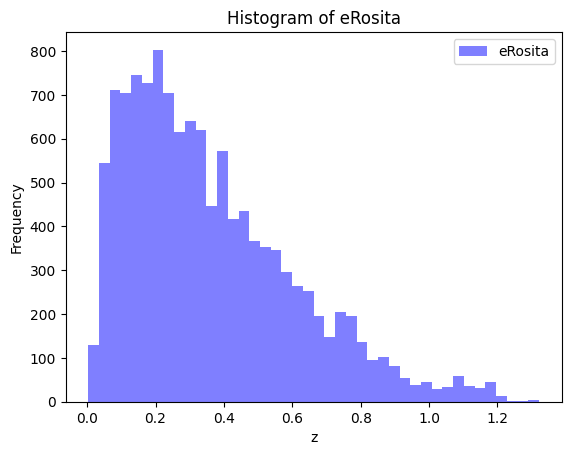

In [109]:
plt.hist(eRass_Bulbul_2024_df['zBest'], bins=42, alpha=0.5, label='eRosita', color='blue') #42 bins reproduit au mieux la figure 1 du papier MCXC
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of eRosita')
plt.legend()
plt.show()

    MCXC

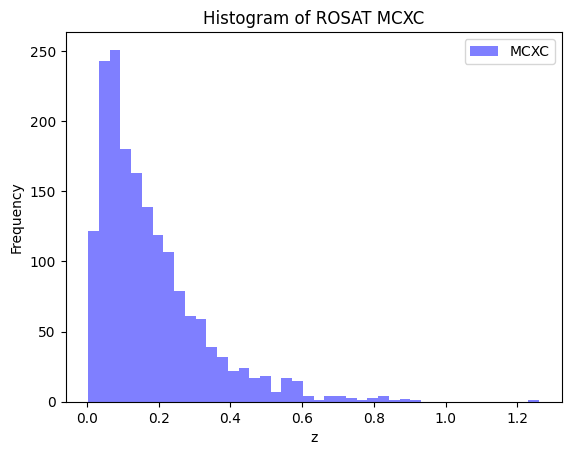

In [49]:
plt.hist(rosat_df['z'], bins=42, alpha=0.5, label='MCXC', color='blue') #42 bins reproduit au mieux la figure 1 du papier MCXC
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of ROSAT MCXC')
plt.legend()
plt.show()

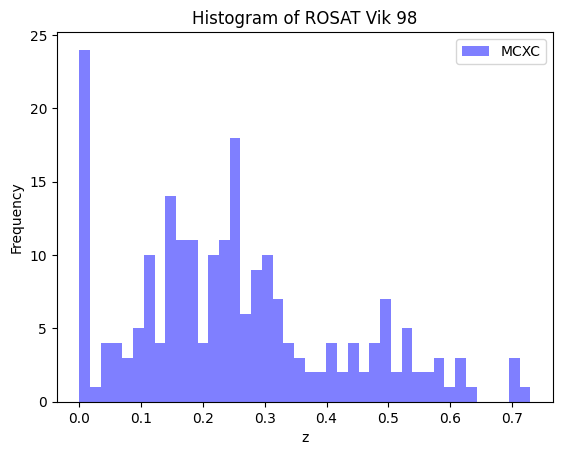

In [105]:
plt.hist(rosat_df_vik_98['z'], bins=42, alpha=0.5, label='MCXC', color='blue') #42 bins reproduit au mieux la figure 1 du papier MCXC
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of ROSAT Vik 98')
plt.legend()
plt.show()

    SDSS

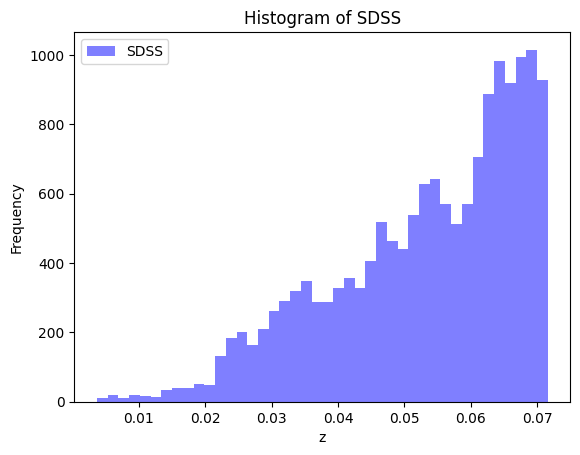

In [60]:
plt.hist(sdss_df['zcmb'], bins=42, alpha=0.5, label='SDSS', color='blue') 
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of SDSS')
plt.legend()
plt.show()

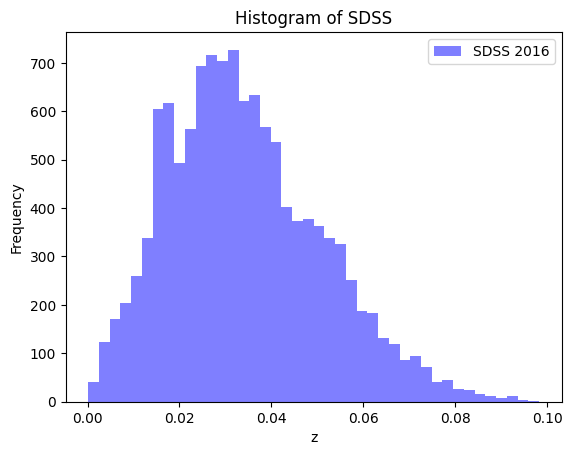

In [90]:
plt.hist(sdss_df_2016['zcmb'], bins=42, alpha=0.5, label='SDSS 2016', color='blue') 
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of SDSS')
plt.legend()
plt.show()

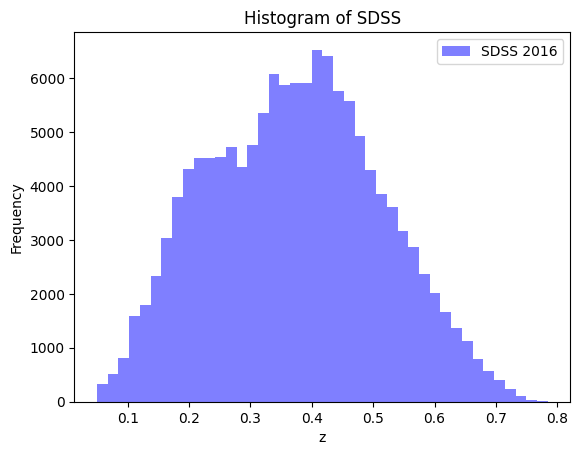

In [102]:
plt.hist(sdss_df_wen_2012['zph'], bins=42, alpha=0.5, label='SDSS 2016', color='blue') 
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of SDSS')
plt.legend()
plt.show()

On projette la position des clusters en coordonnées galactiques (comme à la figure 5 mais sans la distinction par les couleurs des sous-surveys) : 

In [64]:
sub_rosat_df = rosat_df[(rosat_df['_RAJ2000'] > 80) & 
                        (rosat_df['_RAJ2000'] < 110) & 
                        (rosat_df['_DEJ2000'] > 20) & 
                        (rosat_df['_DEJ2000'] < 40)]

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\710069247.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


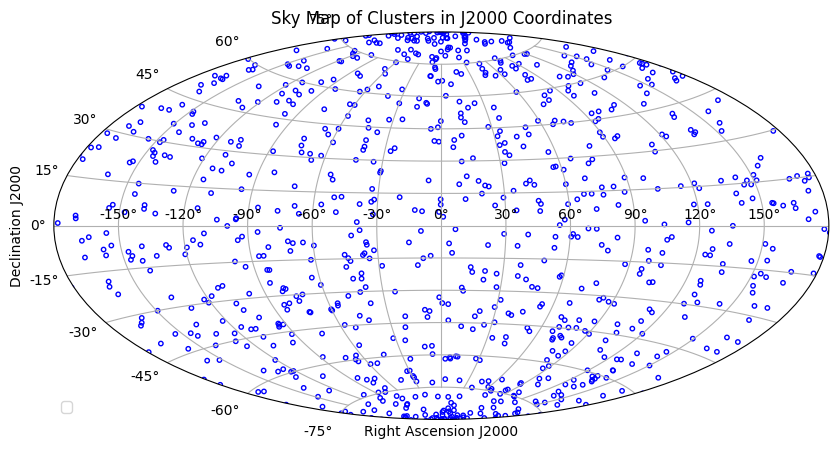

In [66]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection="aitoff")

ax.scatter(rosat_df['_RAJ2000'], rosat_df['_DEJ2000'], s=10,edgecolors='blue',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of Clusters in J2000 Coordinates")



plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\3754118371.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


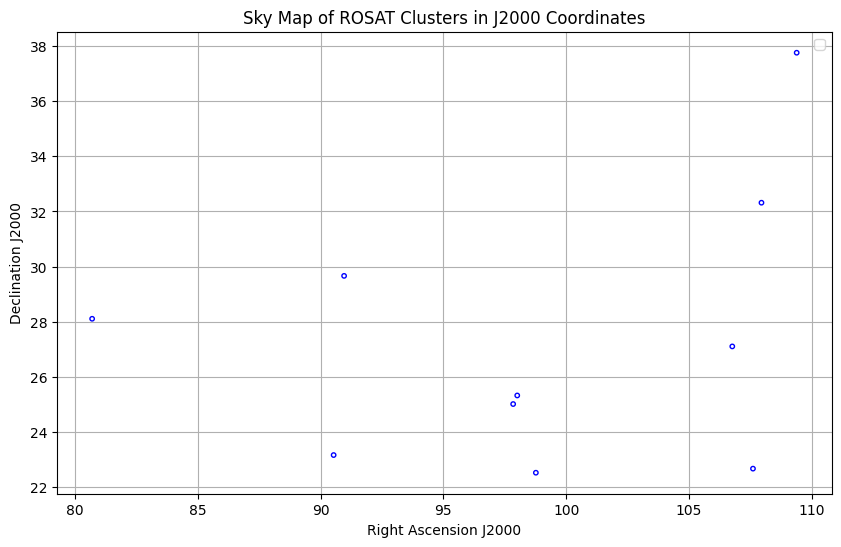

In [67]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(sub_rosat_df['_RAJ2000'], sub_rosat_df['_DEJ2000'], s=10,edgecolors='blue',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of ROSAT Clusters in J2000 Coordinates")


plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\1560970970.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


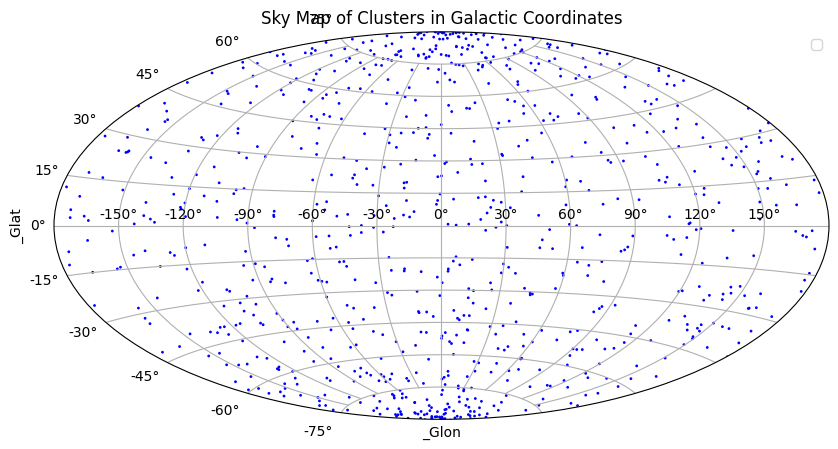

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection="aitoff")

ax.scatter(rosat_df_gal['_Glon'], rosat_df_gal['_Glat'], s=10,edgecolors='blue',facecolors='none')
ax.grid(True)
ax.set_xlabel("_Glon")
ax.set_ylabel("_Glat")
plt.title("Sky Map of Clusters in Galactic Coordinates")



plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\1585018155.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


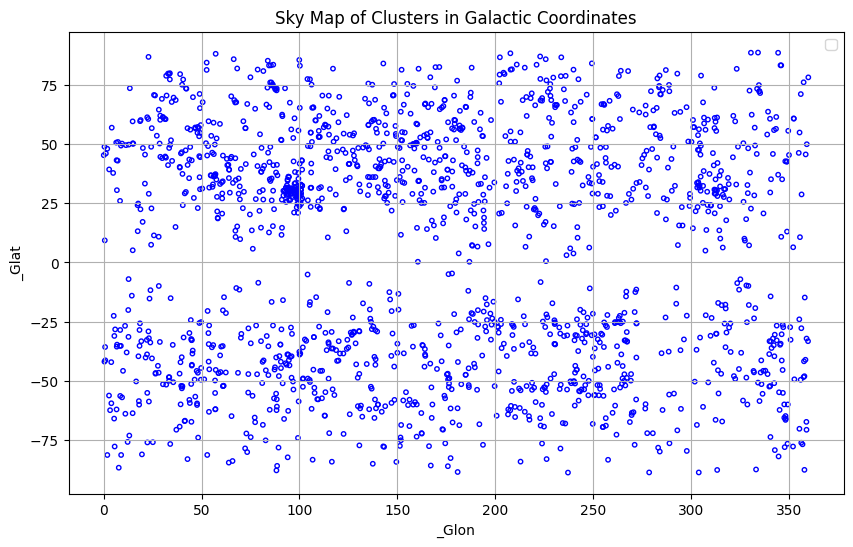

In [88]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(rosat_df_gal['_Glon'], rosat_df_gal['_Glat'], s=10,edgecolors='blue',facecolors='none')
ax.grid(True)
ax.set_xlabel("_Glon")
ax.set_ylabel("_Glat")
plt.title("Sky Map of Clusters in Galactic Coordinates")



plt.legend()
plt.show()

In [75]:
sub_rosat_df_gal = rosat_df_gal[(rosat_df_gal['_Glon'] > 80) & 
                        (rosat_df_gal['_Glon'] < 110) & 
                        (rosat_df_gal['_Glat'] > 20) & 
                        (rosat_df_gal['_Glat'] < 40)]

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\1031541545.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


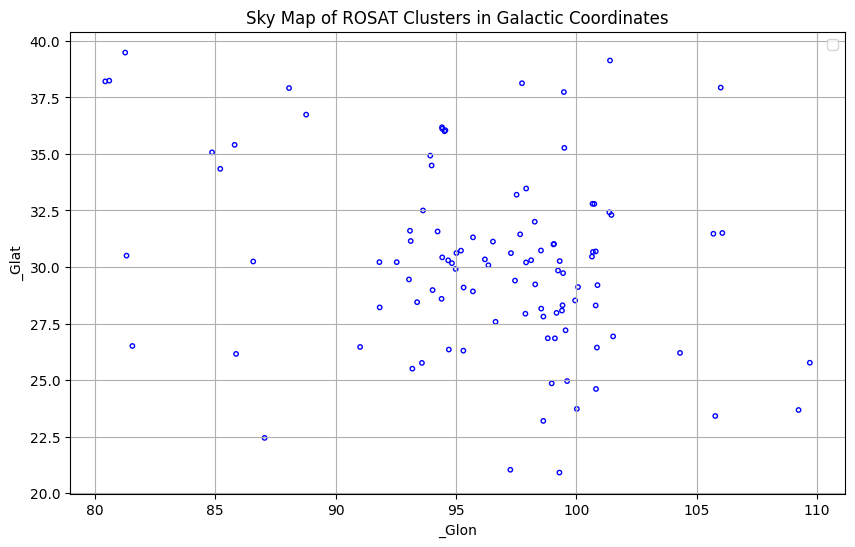

In [79]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(sub_rosat_df_gal['_Glon'], sub_rosat_df_gal['_Glat'], s=10,edgecolors='blue',facecolors='none')
ax.grid(True)
ax.set_xlabel("_Glon")
ax.set_ylabel("_Glat")
plt.title("Sky Map of ROSAT Clusters in Galactic Coordinates")


plt.legend()
plt.show()

Remarque : ne semble pas donner la même projection que dans la figure 5 du papier MCXC → checher à obtenir la même présentation

On cherche à obtenir la même chose avec les données SDSS :

In [84]:
sdss_df

,GroupID,Ngal,RAJ2000,DEJ2000,zcmb,Dist_c,sig_v,sig_sky,Rvir,Rmax,MNFW,MHer,Lrgroup,Den1,Den2,Den4,Den8
0,1,76,187.54713,12.42633,0.00456,13.668,556.3,0.6022,0.6332,1.7638,348.000,595.000,36.400,144.547,56.151,14.526,3.483
1,2,8,184.31322,7.10280,0.00867,25.956,268.7,0.2368,0.3544,0.5091,32.800,54.600,7.150,79.093,32.416,11.621,2.936
2,3,3,189.82627,9.91317,0.00776,23.241,234.3,0.1373,0.2313,0.2291,14.600,24.100,3.780,73.024,42.315,12.178,3.064
3,4,3,185.01042,5.39762,0.00942,28.198,196.6,0.0262,0.0625,0.0415,1.990,3.230,4.330,93.854,32.857,13.348,3.423
4,5,7,189.30249,8.05585,0.00746,22.331,200.0,0.3202,0.5082,0.5953,24.600,40.900,5.380,42.243,17.088,7.415,2.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15710,15711,2,181.68853,42.93451,0.06181,182.939,26.8,0.1514,0.4282,0.2144,0.346,0.346,0.618,10.263,2.246,0.551,0.280
15711,15712,2,209.10235,46.42339,0.06269,185.524,302.6,0.0343,0.0971,0.0491,10.000,10.000,0.631,18.969,12.735,10.637,4.699
15712,15713,2,212.85372,18.02615,0.06668,197.160,134.8,0.1558,0.4406,0.2214,9.040,9.040,0.704,19.199,11.155,4.295,1.902
15713,15714,2,130.80144,-0.54902,0.03114,92.777,126.2,0.1514,0.4284,0.2163,7.700,7.700,2.410,21.215,3.454,0.695,0.424


C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\629164176.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


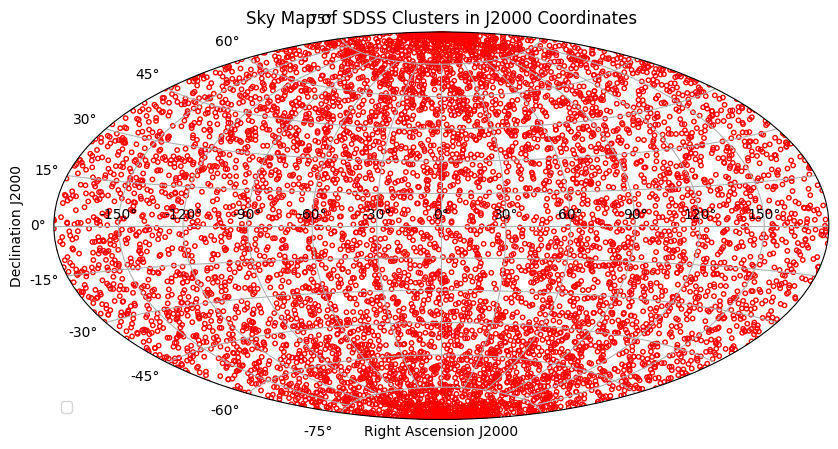

In [83]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection="aitoff")

ax.scatter(sdss_df['RAJ2000'], sdss_df['DEJ2000'], s=10,edgecolors='red',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of SDSS Clusters in J2000 Coordinates")


plt.legend()
plt.show()

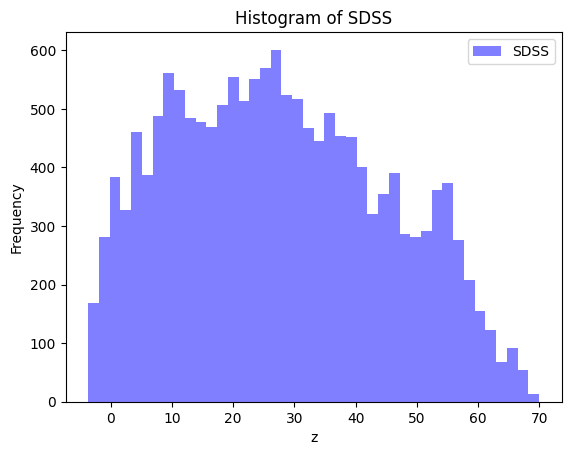

In [86]:
plt.hist(sdss_df['DEJ2000'], bins=42, alpha=0.5, label='SDSS', color='blue') 
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of SDSS')
plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\3646681923.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


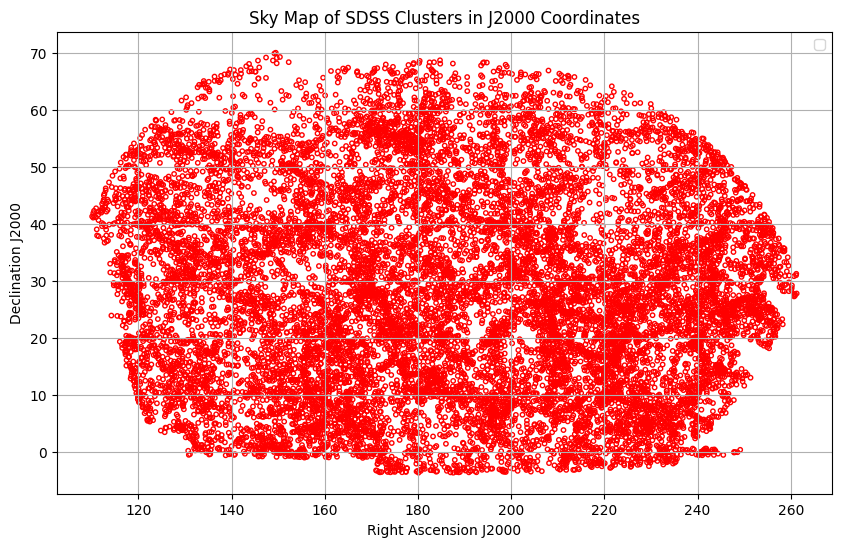

In [87]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(sdss_df['RAJ2000'], sdss_df['DEJ2000'], s=10,edgecolors='red',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of SDSS Clusters in J2000 Coordinates")


plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\1625631964.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


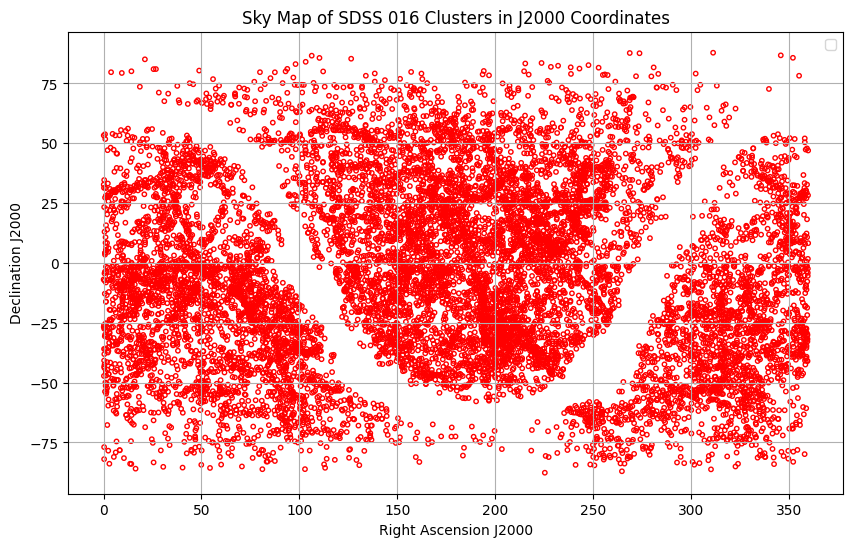

In [92]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(sdss_df_2016['_RAJ2000'], sdss_df_2016['_DEJ2000'], s=10,edgecolors='red',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of SDSS 016 Clusters in J2000 Coordinates")


plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\3035528984.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


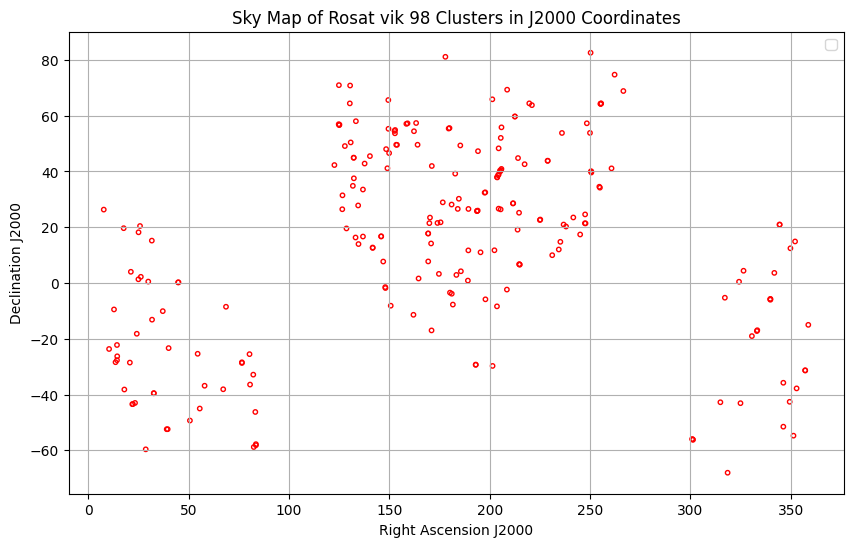

In [107]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(rosat_df_vik_98['_RAJ2000'], rosat_df_vik_98['_DEJ2000'], s=10,edgecolors='red',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of Rosat vik 98 Clusters in J2000 Coordinates")


plt.legend()
plt.show()

On superpose les deux :

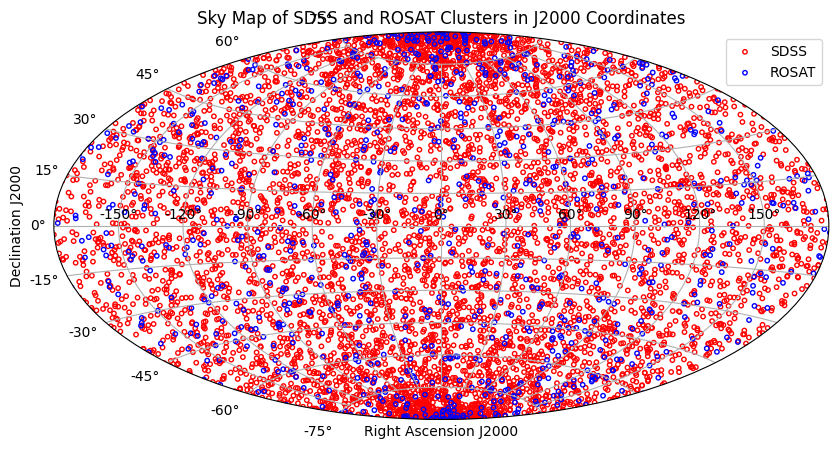

In [56]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(111, projection="aitoff")
ax2 = plt.subplot(111, projection="aitoff")


ax1.scatter(sdss_df['_RAJ2000'], sdss_df['_DEJ2000'], s=10,edgecolors='red',facecolors='none',label='SDSS')
ax1.grid(True)
ax1.set_xlabel("Right Ascension J2000")
ax1.set_ylabel("Declination J2000")

ax2.scatter(rosat_df['_RAJ2000'], rosat_df['_DEJ2000'], s=10,edgecolors='blue',facecolors='none',label='ROSAT')
ax2.grid(True)
ax2.set_xlabel("Right Ascension J2000")
ax2.set_ylabel("Declination J2000")

plt.title("Sky Map of SDSS and ROSAT Clusters in J2000 Coordinates")


plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\1565316948.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


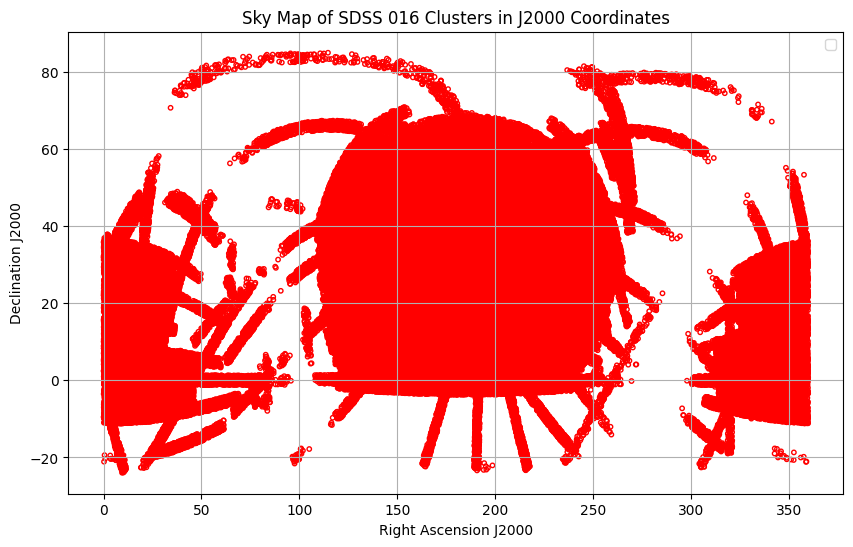

In [103]:
#Footprint Wen 2012
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(sdss_df_wen_2012['_RAJ2000'], sdss_df_wen_2012['_DEJ2000'], s=10,edgecolors='red',facecolors='none')
ax.grid(True)
ax.set_xlabel("Right Ascension J2000")
ax.set_ylabel("Declination J2000")
plt.title("Sky Map of SDSS 016 Clusters in J2000 Coordinates")


plt.legend()
plt.show()

C:\Users\ED282972\AppData\Local\Temp\ipykernel_17564\3704488978.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


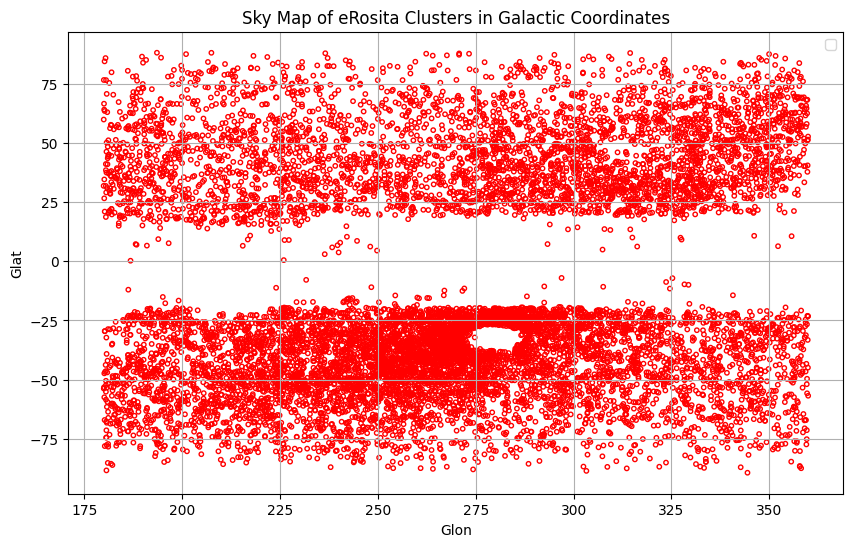

In [111]:
#Footprint Bulbul eRosita 2024
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

ax.scatter(eRass_Bulbul_2024_df['_Glon'], eRass_Bulbul_2024_df['_Glat'], s=10,edgecolors='red',facecolors='none')
ax.grid(True)
ax.set_xlabel("Glon")
ax.set_ylabel("Glat")
plt.title("Sky Map of eRosita Clusters in Galactic Coordinates")


plt.legend()
plt.show()